In [3]:
import numpy as nm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn import over_sampling
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import pickle

In [4]:
data=pd.read_csv('Milk Grading (1).csv')
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,1.0
1,6.6,36,0,1,0,1,253,1.0
2,8.5,70,1,1,1,1,246,0.0
3,9.5,34,1,1,0,1,255,0.0
4,6.6,37,0,0,0,0,255,0.5


In [5]:
data.shape

(1059, 8)

In [6]:
#dividing the dataset into dependent and independent y and x respectively
y = data['Grade']
x = data.drop(columns=['Grade'],axis=1)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

In [8]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [9]:
print(x_train)

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
505   6.6          38      0     0     0          0     255
928   6.6          45      0     0     0          1     250
650   6.8          45      0     1     0          0     240
626   6.5          40      1     0     0          0     250
443   6.8          45      1     1     1          1     245
...   ...         ...    ...   ...   ...        ...     ...
1033  6.6          38      0     0     0          0     255
763   5.6          50      0     1     1          1     255
835   4.7          38      1     0     1          0     255
559   9.0          43      1     0     1          1     250
684   6.5          38      1     0     0          0     255

[847 rows x 7 columns]


In [10]:
print(y_train)

505     0
928     0
650     0
626     0
443     1
       ..
1033    0
763     0
835     0
559     0
684     0
Name: Grade, Length: 847, dtype: int64


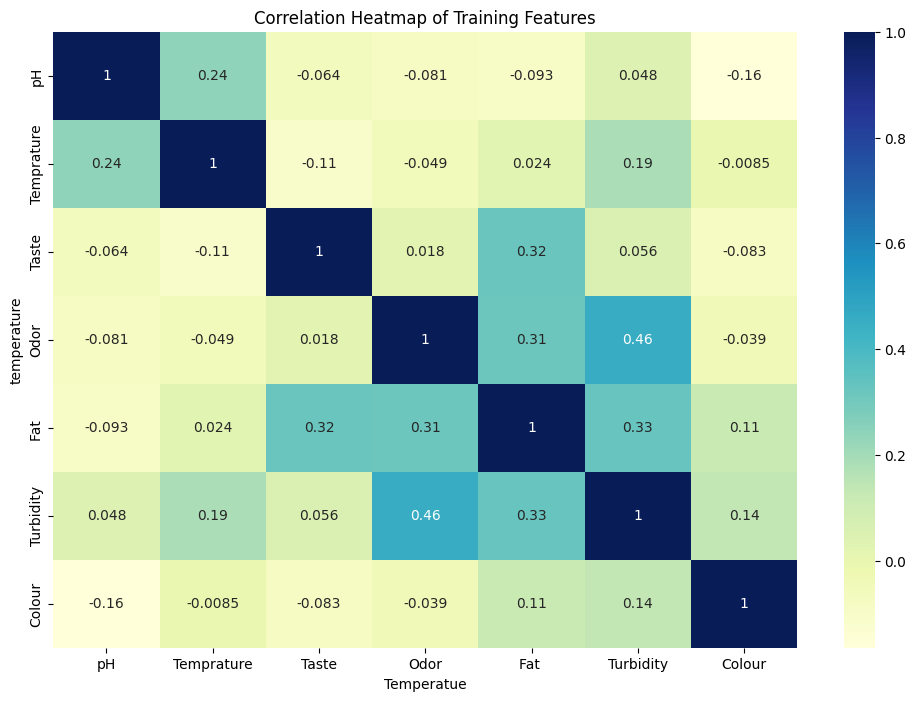

In [11]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(x.corr(), annot=True, cmap="YlGnBu")

# Set axis labels and title
plt.xlabel("Temperatue")
plt.ylabel("temperature")
plt.title("Correlation Heatmap of Training Features")

# Show the plot
plt.show()

array([[<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'Temprature'}>,
        <Axes: title={'center': 'Taste'}>],
       [<Axes: title={'center': 'Odor'}>,
        <Axes: title={'center': 'Fat '}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Colour'}>,
        <Axes: title={'center': 'Grade'}>, <Axes: >]], dtype=object)

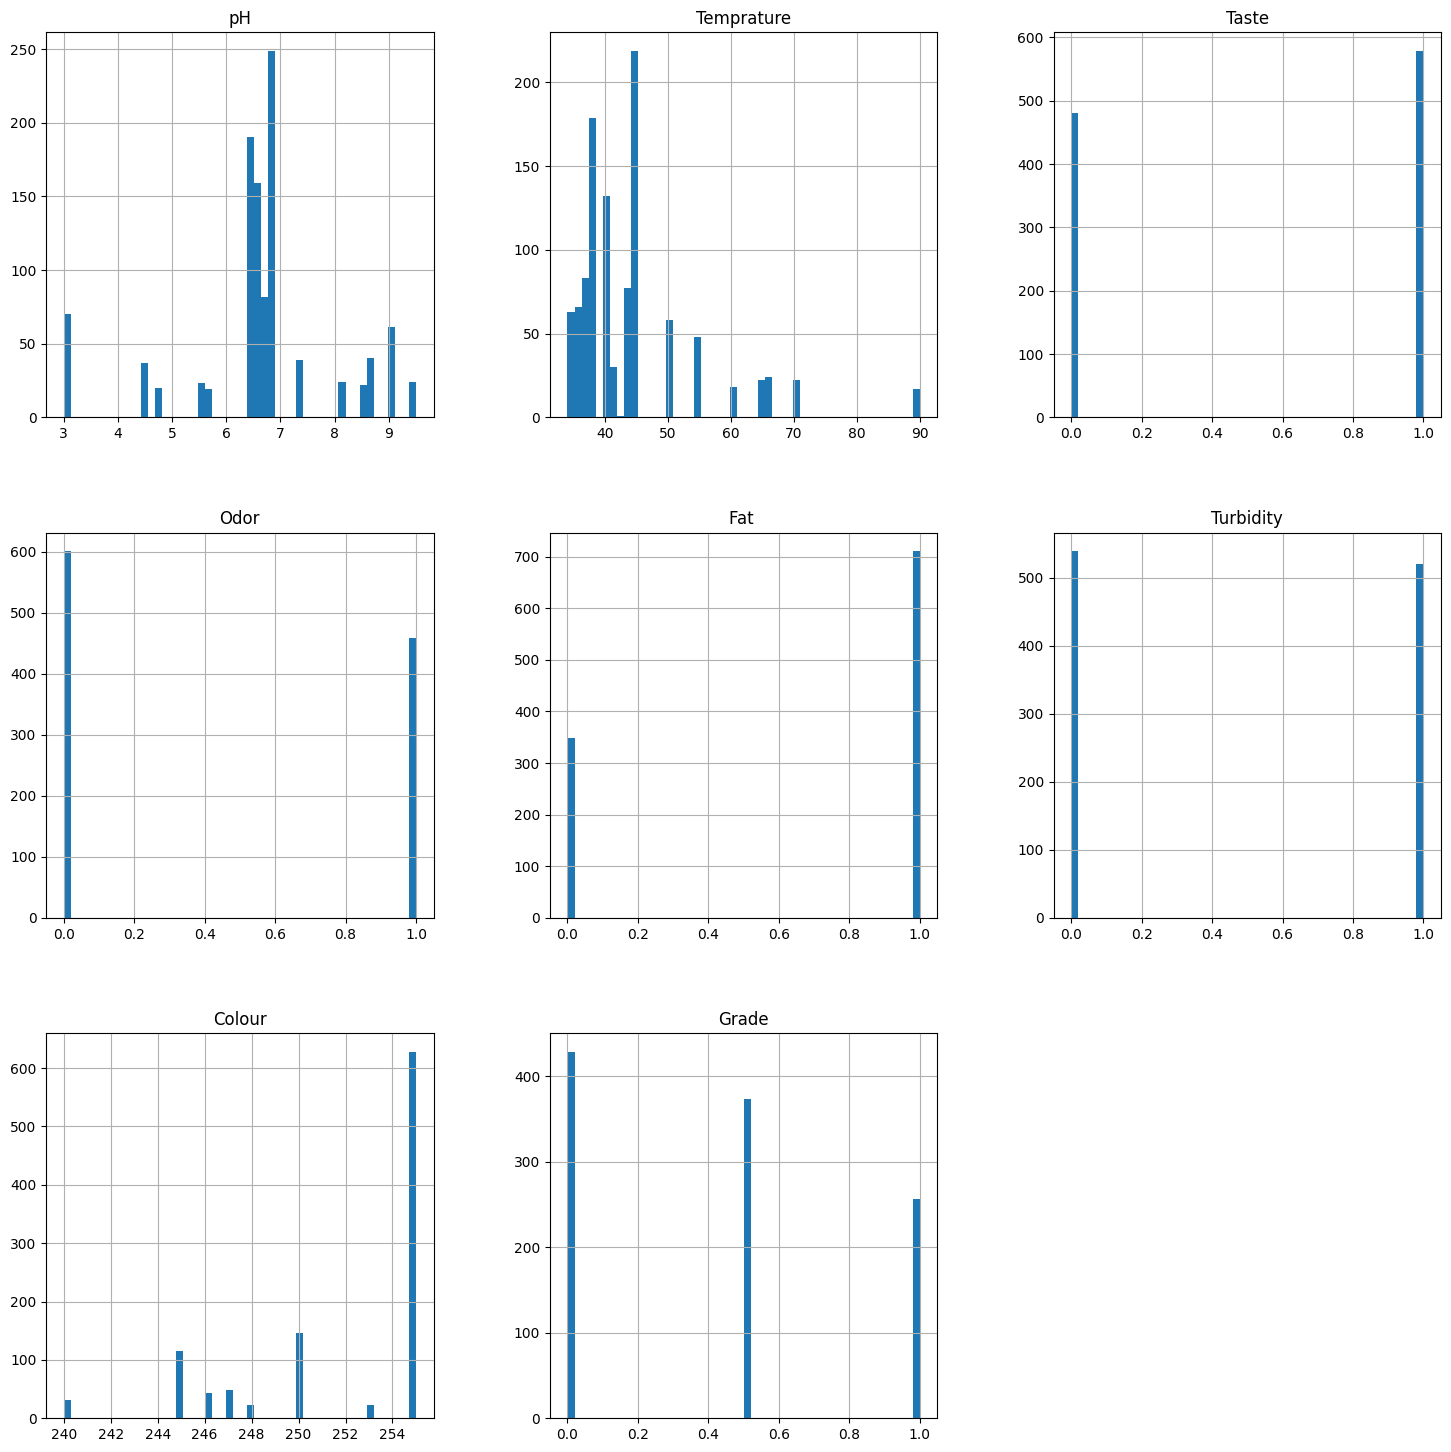

In [12]:
data.hist(bins=50, figsize=(18,18))

In [13]:
#logistic Regresion
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.metrics import accuracy_score
y_p=model.predict(x_test)
print(accuracy_score(y_p,y_test))

0.7688679245283019


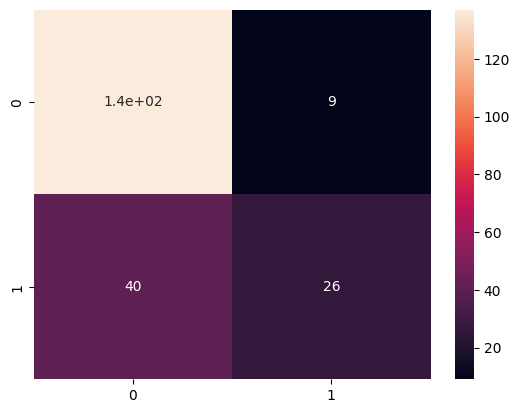

[[137  40]
 [  9  26]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       177
           1       0.39      0.74      0.51        35

    accuracy                           0.77       212
   macro avg       0.67      0.76      0.68       212
weighted avg       0.85      0.77      0.79       212



In [15]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_p)
sns.heatmap(cm, annot=True)
plt.show()
print(confusion_matrix(y_p,y_test))

print(classification_report(y_p,y_test))

In [16]:
#Random forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_predict1)
test_accuracy

0.9952830188679245

In [17]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy

1.0

In [18]:
pd.crosstab(y_test,y_predict1)

col_0,0,1
Grade,,
0,146,0
1,1,65


In [19]:
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       146
           1       1.00      0.98      0.99        66

    accuracy                           1.00       212
   macro avg       1.00      0.99      0.99       212
weighted avg       1.00      1.00      1.00       212



0.7688679245283019


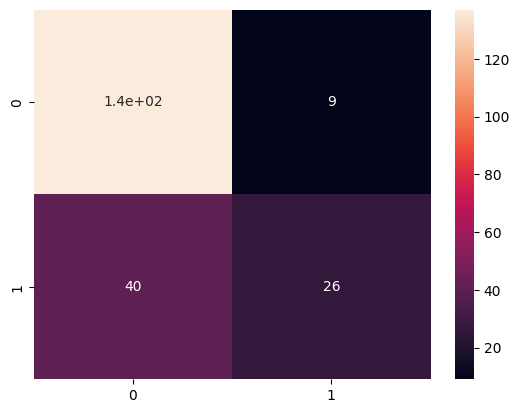

[[137  40]
 [  9  26]]


In [20]:
from sklearn.metrics import accuracy_score
y_p=model.predict(x_test)
print(accuracy_score(y_p,y_test))

from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_p)
sns.heatmap(cm, annot=True)
plt.show()
print(confusion_matrix(y_p,y_test))

In [21]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
def knn_model_fitting(x_train, x_test, y_train, y_test, n_neighbors):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train, y_train)
    preds = knn.predict(x_test)
    score = knn.score(x_test, y_test)
    print('The mean accuracy of this KNN classifier is: {}'.format(score))
    return preds, knn
# here just set the # of neighbors =1 to see the model performance
n_neighbors= 1
preds_default, knn_default = knn_model_fitting(x_train, x_test, y_train, y_test,n_neighbors)

The mean accuracy of this KNN classifier is: 1.0


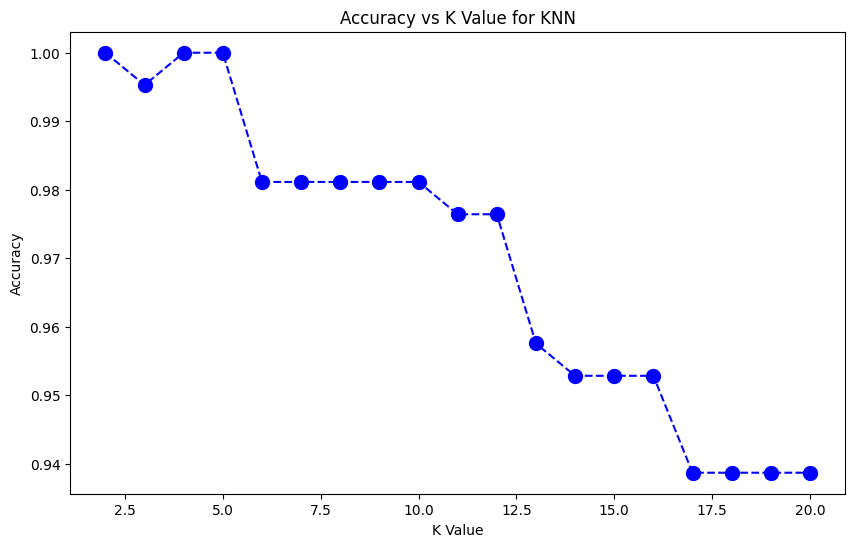

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       146
           1       0.00      0.00      0.00        66

    accuracy                           0.69       212
   macro avg       0.34      0.50      0.41       212
weighted avg       0.47      0.69      0.56       212



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# Define a list to store the accuracies for different K values
accuracies = []

# Loop through different K values from 2 to 20
for k in range(2, 21):
    # Initialize and fit the KNN classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    # Predict labels for the test data
    y_pred = knn.predict(x_test)

    # Calculate the accuracy for the current K value
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy to the list
    accuracies.append(accuracy)

# Plot the accuracy vs K graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), accuracies, color="blue", linestyle="--", marker="o", markersize=10)

# Set labels and title
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value for KNN")

# Display the plot
plt.show()
print

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_predict))

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)
y_predict=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_predict)
test_accuracy

0.6886792452830188

In [24]:
y_train_predict=svc.predict(x_train)
train_accuracy-accuracy_score(y_train,y_train_predict)
train_accuracy

1.0

In [25]:
pd.crosstab(y_test,y_predict)

col_0,0
Grade,
0,146
1,66


In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       146
           1       0.00      0.00      0.00        66

    accuracy                           0.69       212
   macro avg       0.34      0.50      0.41       212
weighted avg       0.47      0.69      0.56       212



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_predict1)
test_accuracy

0.9952830188679245

In [29]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy

1.0

In [30]:
pd.crosstab(y_test,y_predict1)

col_0,0,1
Grade,,
0,146,0
1,1,65


In [31]:
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       146
           1       1.00      0.98      0.99        66

    accuracy                           1.00       212
   macro avg       1.00      0.99      0.99       212
weighted avg       1.00      1.00      1.00       212



In [36]:
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('Milk Grading (1).csv')

# Separate features and target variable
X = data.drop('Grade', axis=1)  # Assuming 'Grade' is your target variable
y = data['Grade']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost regressor
base_estimator = DecisionTreeRegressor(max_depth=1, random_state=42)
ada_regressor = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Train the model
ada_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = ada_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Accuracy: {accuracy * 100:.2f}%")

Mean Squared Error: 0.09945869469727378
Accuracy: 93.87%


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [40]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('Milk Grading (1).csv')  # Replace 'your_dataset.csv' with your actual dataset file path

# Separate features and target variable
X = data.drop('Grade', axis=1)  # Assuming 'Grade' is your target variable
y = data['Grade']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gb_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Accuracy: {accuracy * 100:.2f}%")

Mean Squared Error: 0.007688032210230582
Accuracy: 93.87%
